# gqrs detection

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/scidb/HeartRatePatterns/Python')

#QRSDetectorOffline.py
from QRSDetectorOffline import QRSDetectorOffline

Downloading an ECG from mimic III 

In [2]:
folder = "p05/p050140"
waveform = "p050140-2188-07-26-05-51"
sig, fields = wfdb.srdsamp(waveform,pbdir='mimic3wdb/matched/'+folder, sampto=10000)

In [3]:
print("signame: " + str(fields['signame']))
print("units: " + str(fields['units']))
print("fs: " + str(fields['fs']))
print("comments: " + str(fields['comments']))
print("fields: " + str(fields))

signame: ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH']
units: ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU']
fs: 125
comments: ['Location: micu']
fields: {'fs': 125, 'comments': ['Location: micu'], 'units': ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU'], 'signame': ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH']}


Lets check if the signal contains the signal II

In [4]:
signalII = None
try:
    signalII = fields['signame'].index("II")
except ValueError:
    print("List does not contain value")
if(signalII!=None):
    print("List contain value")

List contain value


Obtain only the signal II from the ECG

In [5]:
array = sig[:, signalII]
array = np.nan_to_num(array)

Save the Frame Secuence

In [6]:
fs = fields['fs']
fs

125

Create Numpy Array

In [7]:
npArray = np.array(array)
npArray

array([ 0.        ,  0.        ,  0.        , ...,  0.31496063,
        0.32283465,  0.33070866])

check sig:

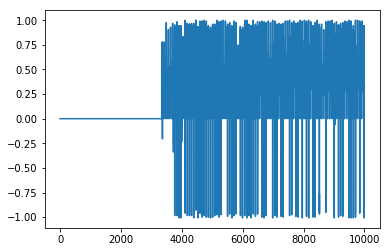

In [8]:
plt.plot(npArray)
plt.show()

In [9]:
sha = np.arange(npArray.shape[0])

In [10]:
test = np.stack((sha, np.nan_to_num(npArray))).T

qrs peaks indices
[3769 3841 3908 3977 4115 4185 4254 4323 4395 4461 4531 4600 4672 4740 4810
 4876 4946 5015 5085 5156 5224 5296 5505 5575 5646 5719 5786 5928 5997 6068
 6138 6209 6280 6354 6421 6492 6632 6703 6773 6986 7059 7125 7265 7337 7542
 7612 7751 7824 7963 8102 8169 8309 8382 8522 8732 9011 9151 9221 9293 9501
 9569 9639 9708 9847 9986]
noise peaks indices
[]


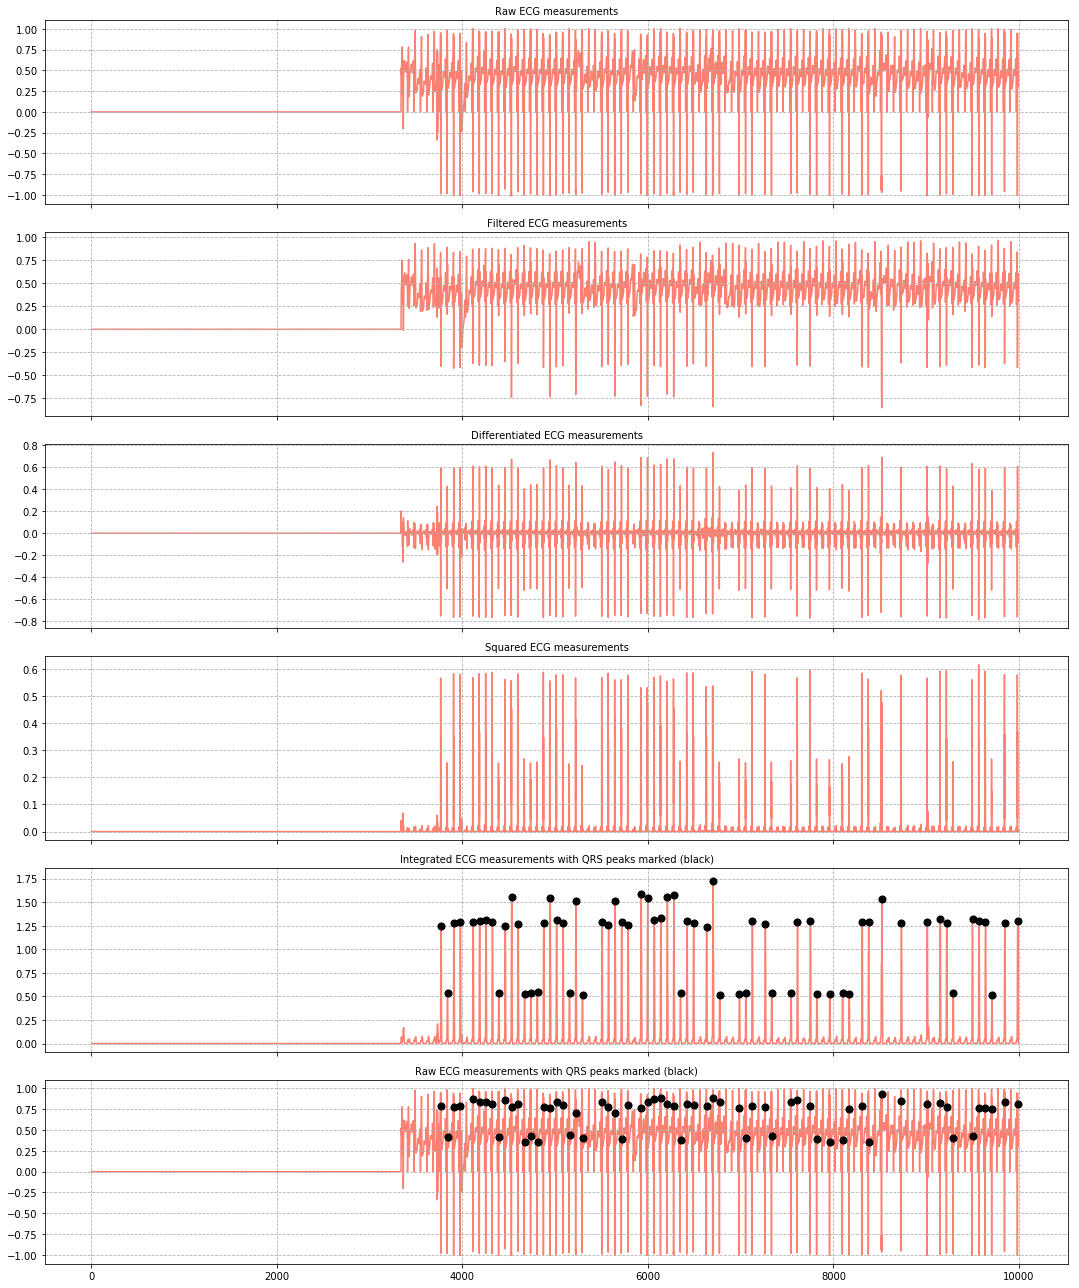

In [11]:
ecg_data_path = 'ecg_data/'+waveform+'.csv'
np.savetxt(ecg_data_path, test, delimiter=',')
qrs_detector = QRSDetectorOffline(ecg_data_path=ecg_data_path, verbose=True,log_data=True, plot_data=True, 
                                  show_plot=True,signal_frequency=fs)

In [12]:
first = qrs_detector.qrs_peaks_indices[0]
someLater = qrs_detector.qrs_peaks_indices[20]

Small array

In [13]:
small = npArray[first:someLater]
sha = np.arange(small.shape[0])

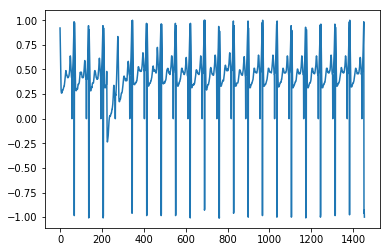

In [14]:
plt.plot(small)
plt.show()

In [15]:
test = np.stack((sha, np.nan_to_num(small))).T
test

array([[  0.00000000e+00,   9.21259843e-01],
       [  1.00000000e+00,   7.87401575e-01],
       [  2.00000000e+00,   6.22047244e-01],
       ..., 
       [  1.45200000e+03,  -9.60629921e-01],
       [  1.45300000e+03,  -9.29133858e-01],
       [  1.45400000e+03,  -1.00000000e+00]])

qrs peaks indices
[  72  139  208  346  416  485  554  626  692  762  831  903  971 1041 1107
 1177 1246 1316 1387 1452]
noise peaks indices
[]


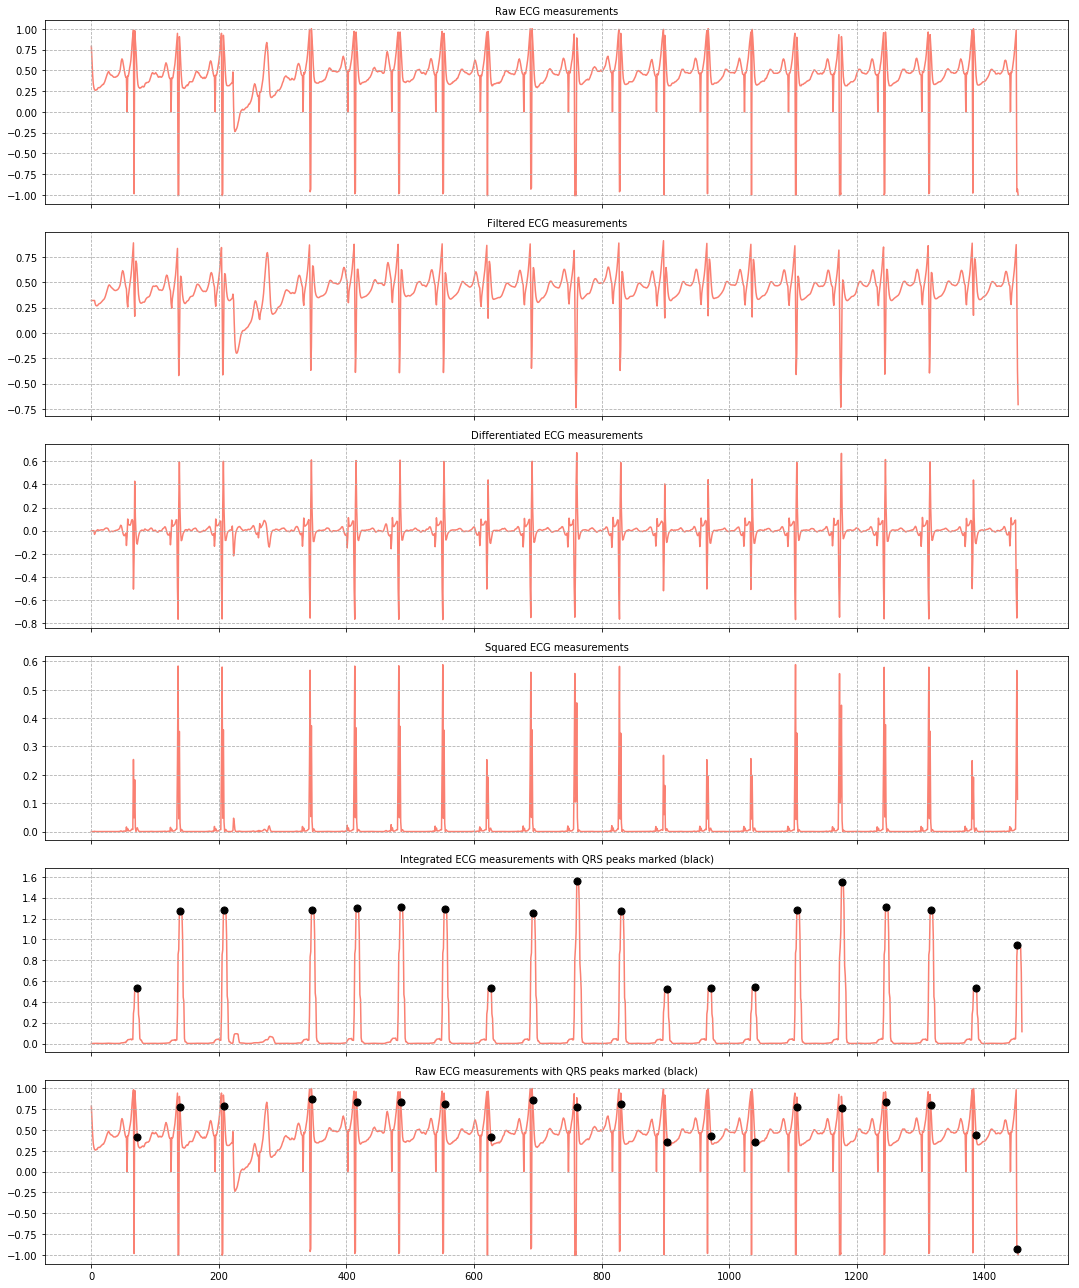

In [16]:
ecg_data_path = 'ecg_data/small.csv'
np.savetxt(ecg_data_path, test, delimiter=',')
qrs_detector = QRSDetectorOffline(ecg_data_path=ecg_data_path, verbose=True,log_data=True, plot_data=True, 
                                  show_plot=True,signal_frequency=fs)

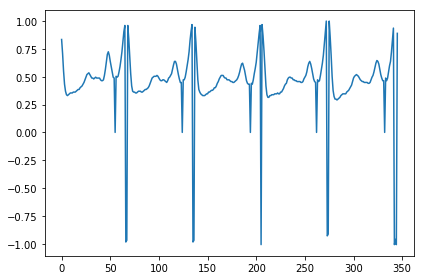

In [17]:
first = qrs_detector.qrs_peaks_indices[4]
someLater = qrs_detector.qrs_peaks_indices[9]
small = qrs_detector.ecg_data_detected[first:someLater,1]
plt.plot(small)
plt.tight_layout()
plt.show()